In [1]:
import pandas as pd
import numpy as np

In [2]:
from IPython.display import display
pd.set_option('display.max_columns', None)

In [3]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve


In [4]:
from sklearn.metrics import roc_auc_score

In [5]:
data = pd.read_feather("C:/Users/Hp/OneDrive/Desktop/churn model/final_2015_v19")
data.head()

LeaseID  PriorLeaseID  NextLeaseID  PropertyID  ResidentHouseholdID  \
0   3744.0        3404.0          NaN   1003904.0               2466.0   
1   3746.0           NaN          NaN   1003904.0               2684.0   
2   3748.0           NaN          NaN   1003904.0               2686.0   
3   3751.0        3409.0       4079.0   1003904.0                400.0   
4   3755.0           NaN          NaN   1003904.0               2697.0   

   UnitID      LeaseUID ResidentHouseholdUID      UnitUID L_LeaseTermName  \
0   161.0  1003904-3744         1003904-2466  1003904-161  12 month lease   
1   180.0  1003904-3746         1003904-2684  1003904-180  14 month lease   
2   190.0  1003904-3748         1003904-2686  1003904-190   6 month lease   
3    27.0  1003904-3751          1003904-400   1003904-27  12 month lease   
4   107.0  1003904-3755         1003904-2697  1003904-107  14 month lease   

           L_Status  L_PeriodRentAmount L_BeginDate  L_EndDate  \
0   Former resident              1845.0  2015-01-16 2016-01-11   
1   Former resident              1103.0  2015-01-08 2016-02-28   
2   Former resident              2152.0  2015-01-08 2015-06-14   
3  Current resident              1136.0  2015-01-24 2016-01-17   
4   Former resident              1232.0  2015-01-01 2015-10-04   

  L_ScheduledMoveOutDate L_ScheduledMoveInDate L_MoveInDate L_MoveOutDate  \
0             2016-01-16            2013-12-14   2013-12-14    2016-01-16   
1             2015-07-30            2015-01-08   2015-01-08    2015-07-30   
2             2015-06-20            2015-01-08   2015-01-08    2015-06-20   
3                    NaT            2003-09-11   2003-09-11           NaT   
4             2015-06-05            2015-01-01   2015-01-01    2015-06-05   

  L_MoveOutCategory                  L_MoveOutReason L_NoticeOnDate  \
0  Lifestyle change                     Renting home     2015-12-03   
1  Lifestyle change              Employment transfer     2015-07-01   
2  Lifestyle change                      Moving home     2015-05-20   
3              None                             None            NaT   
4  Lifestyle change  Moving out of area/town/country     2015-05-04   

  L_MonthToMonthDate  L_CancelRejectIndicator L_CancelDate  L_MonthlyRent  \
0         2016-01-12                    False          NaT         1155.0   
1                NaT                    False          NaT         1103.0   
2         2015-06-15                    False          NaT         1478.0   
3                NaT                    False          NaT         1136.0   
4                NaT                    False          NaT         1232.0   

   L_InvalidFlag  L_CancelFlag  L_DataInclusionFlag L_NextBeginDate  \
0              0             0                    1             NaT   
1              0             0                    1             NaT   
2              0             0                    1             NaT   
3              0             0                    1      2016-01-18   
4              0             0                    1             NaT   

   L_Duration L_DurationBin  RH_LeaseIndex  U_LeaseIndex  RH_LeaseIndexRev  \
0          12   6-12 months            2.0          13.0               1.0   
1          13     1-3 years            1.0          16.0               1.0   
2           5    3-6 months            1.0          14.0               1.0   
3          12   6-12 months           13.0          15.0               7.0   
4           9   6-12 months            1.0          17.0               1.0   

   U_LeaseIndexRev  RH_FirstLeaseFlag  U_FirstLeaseFlag  RH_LatestLeaseFlag  \
0              8.0                  0                 0                   1   
1              6.0                  1                 0                   1   
2              9.0                  1                 0                   1   
3              7.0                  0                 0                   0   
4              9.0                  1                 

In [6]:
data.shape

(239551, 210)

In [6]:
columns_v3=pd.read_csv("C:/Users/Hp/OneDrive/Desktop/churn model/columns_v3.csv")

In [7]:
list1=[]
for i in range(len(columns_v3)):
    if columns_v3['in_flag'][i]==0:
        list1.append(columns_v3['name'][i])
        
list1

['LeaseID',
 'PriorLeaseID',
 'NextLeaseID',
 'PropertyID',
 'ResidentHouseholdID',
 'UnitID',
 'ResidentHouseholdUID',
 'UnitUID',
 'L_LeaseTermName',
 'L_Status',
 'L_PeriodRentAmount',
 'L_BeginDate',
 'L_EndDate',
 'L_ScheduledMoveOutDate',
 'L_ScheduledMoveInDate',
 'L_MoveInDate',
 'L_MoveOutDate',
 'L_MoveOutCategory',
 'L_MoveOutReason',
 'L_NoticeOnDate',
 'L_MonthToMonthDate',
 'L_CancelRejectIndicator',
 'L_CancelDate',
 'L_InvalidFlag',
 'L_CancelFlag',
 'L_DataInclusionFlag',
 'L_NextBeginDate',
 'RH_LeaseIndexRev',
 'U_LeaseIndexRev',
 'RH_FirstLeaseFlag',
 'U_FirstLeaseFlag',
 'RH_LatestLeaseFlag',
 'U_LatestLeaseFlag',
 'L_EvictionFlag',
 'L_ActiveFlag',
 'L_ModelInclusionFlag',
 'L_RenewalFlag',
 'L_TransferFlag',
 'L_EndYear',
 'L_ActualBeginDate',
 'L_ActualEndDate',
 'L_ActualBeginQuarter',
 'L_ActualBeginYear',
 'L_ActualEndYear',
 'L_ActualDuration',
 'L_ActualDurationBin',
 'L_MTMFlag',
 'L_MTMDuration',
 'EI_Experience_0_Future Resident',
 'EI_Experience_1_Trans

In [8]:
data=data.drop(list1,axis=1)

In [10]:
data.shape

(239551, 134)

In [9]:
df_train=pd.read_feather("C:/Users/Hp/OneDrive/Desktop/churn model/df_train")
df_test=pd.read_feather("C:/Users/Hp/OneDrive/Desktop/churn model/df_test")
df_valid=pd.read_feather("C:/Users/Hp/OneDrive/Desktop/churn model/df_valid")

In [13]:
    df_train.head()

LeaseUID  L_MonthlyRent  L_Duration  RH_LeaseIndex  U_LeaseIndex  \
0  1027515-13523         2272.0          12              1             7   
1  1023394-23196         2374.0          12              6            10   
2      4499308-8         1206.0          11              1             1   
3  1310609-22395         2346.0          12              1             9   
4  2335216-33429         1385.0          12              9             9   

   L_ChurnFlag  L_ActualBeginYear  L_PrevRentAmount  L_PercRentIncrease  \
0            1               2016              -1.0           -1.000000   
1            0               2017            2296.0            0.033972   
2            0               2018              -1.0           -1.000000   
3            0               2017              -1.0           -1.000000   
4            0               2018            2962.0           -0.532411   

   EI_NPS_0_Future Resident  EI_NPS_1_Transfer  EI_NPS_2_Move In  \
0                      -1.0               -1.0              -1.0   
1                      -1.0               -1.0              -1.0   
2                      -1.0               -1.0              -1.0   
3                      -1.0               -1.0              -1.0   
4                      -1.0               -1.0              -1.0   

   EI_NPS_3_3 Month  EI_NPS_4_First Maintenance  EI_NPS_5_6 Month  \
0              -1.0                        -1.0              -1.0   
1              -1.0                        -1.0              -1.0   
2              -1.0                        -1.0              -1.0   
3               8.0                        -1.0               8.0   
4              -1.0                        -1.0              -1.0   

   EI_NPS_6_9 Month  EI_NPS_7_Mid Lease Maintenance  EI_NPS_8_12 Month  \
0              -1.0                            -1.0               -1.0   
1              -1.0                            -1.0               -1.0   
2              -1.0                            -1.0               -1.0   
3              -1.0                             9.0               -1.0   
4              -1.0                            -1.0               -1.0   

   EI_NPS_9_15 Month  EI_NPS_10_18 Month  EI_NPS_11_Renewal  \
0               -1.0                -1.0               -1.0   
1               -1.0                -1.0               -1.0   
2               -1.0                -1.0               -1.0   
3               -1.0                -1.0               -1.0   
4               -1.0                -1.0               -1.0   

   EI_NPS_12_Move Out  EI_NumSurveys  EI_NPS_X_First Score  \
0                -1.0              0                  -1.0   
1                -1.0              0                  -1.0   
2                -1.0              0                  -1.0   
3                -1.0              3                   8.0   
4                -1.0              0                  -1.0   

   EI_NPS_X_Latest Score  EI_NPS_Min Score  EI_NPS_Max Score  \
0                   -1.0              -1.0              -1.0   
1                   -1.0              -1.0              -1.0   
2                   -1.0              -1.0              -1.0   
3                    3.0               3.0               9.0   
4                   -1.0              -1.0              -1.0   

   EI_NPS_Avg Score  EI_NPS_Growth  EI_NPS_PercGrowth  RI_ParkingFlag  \
0              -1.0           -1.0             -1.000               0   
1              -1.0           -1.0             -1.000               0   
2              -1.0           -1.0             -1.000               0   
3               7.0           -5.0             -0.625               0   
4              -1.0           -1.0             -1.000               0   

   SR_NumRequests  SR_NumSubRequests  SR_NumSubRequestsFirstWeek  \
0               7                  7                           1   
1               3                  3                           1   
2              15                 14               

In [10]:
train_data_v19 = data.loc[data["LeaseUID"].isin(df_train["LeaseUID"])].reset_index(drop=True)
train_data_v19.head()

LeaseUID  L_MonthlyRent  L_Duration L_DurationBin  RH_LeaseIndex  \
0  1003904-3746         1103.0          13     1-3 years            1.0   
1  1003904-3751         1136.0          12   6-12 months           13.0   
2  1003904-3756         1382.0          12   6-12 months            1.0   
3  1003904-3759         1135.0          14     1-3 years            1.0   
4  1003904-3766         1405.0          12   6-12 months            2.0   

   U_LeaseIndex  L_ChurnFlag  L_PrevRentAmount  L_PercRentIncrease  \
0          16.0            1               NaN                 NaN   
1          15.0            0            1103.0            0.029918   
2          14.0            0               NaN                 NaN   
3          13.0            1               NaN                 NaN   
4          11.0            0            1364.0            0.030059   

   EI_NPS_0_Future Resident  EI_NPS_1_Transfer  EI_NPS_2_Move In  \
0                       NaN                NaN               NaN   
1                       NaN                NaN               NaN   
2                       NaN                NaN               NaN   
3                       NaN                NaN               NaN   
4                       NaN                NaN               NaN   

   EI_NPS_3_3 Month  EI_NPS_4_First Maintenance  EI_NPS_5_6 Month  \
0               NaN                         NaN               NaN   
1               NaN                         NaN               NaN   
2               NaN                         NaN               NaN   
3               NaN                         NaN               NaN   
4               NaN                         NaN               NaN   

   EI_NPS_6_Mid Lease Maintenance  EI_NPS_7_9 Month  EI_NPS_8_12 Month  \
0                             NaN               NaN                NaN   
1                             NaN               NaN                NaN   
2                             NaN               NaN                NaN   
3                             NaN               NaN                NaN   
4                             NaN               NaN                NaN   

   EI_NPS_9_15 Month  EI_NPS_10_18 Month  EI_NPS_11_Renewal  \
0                NaN                 NaN                NaN   
1                NaN                 NaN                NaN   
2                NaN                 NaN                NaN   
3                NaN                 NaN                NaN   
4                NaN                 NaN                NaN   

   EI_NPS_12_Move Out  EI_NumSurveys  EI_NPS_X_First Score  \
0                 NaN            NaN                   NaN   
1                 NaN            NaN                   NaN   
2                 NaN            NaN                   NaN   
3                 NaN            NaN                   NaN   
4                 NaN            NaN                   NaN   

   EI_NPS_X_Latest Score  EI_NPS_Min Score  EI_NPS_Max Score  \
0                    NaN               NaN               NaN   
1                    NaN               NaN               NaN   
2                    NaN               NaN               NaN   
3                    NaN               NaN               NaN   
4                    NaN               NaN               NaN   

   EI_NPS_Avg Score  EI_NPS_Growth  EI_NPS_PercGrowth  RI_ParkingFlag  \
0               NaN            NaN                NaN             0.0   
1               NaN            NaN                NaN             0.0   
2               NaN            NaN                NaN             0.0   
3               NaN            NaN                NaN             0.0   
4               NaN            NaN                NaN             0.0   

   RI_ParkingFlag_PERM  RI_ParkingFlag_RESERVED  RI_ParkingFlag_UNRESERVED  \
0                  0.0                      0.0                        0.0   
1                  0.0                      0.0                        0.0   
2                  0.0                      0.0         

In [11]:
test_data_v19 = data.loc[data["LeaseUID"].isin(df_test["LeaseUID"])].reset_index(drop=True)
valid_data_v19 = data.loc[data["LeaseUID"].isin(df_valid["LeaseUID"])].reset_index(drop=True)

In [12]:
data1 = pd.read_feather("C:/Users/Hp/OneDrive/Desktop/churn model/final_2015_v19")
data1.head()

LeaseID  PriorLeaseID  NextLeaseID  PropertyID  ResidentHouseholdID  \
0   3744.0        3404.0          NaN   1003904.0               2466.0   
1   3746.0           NaN          NaN   1003904.0               2684.0   
2   3748.0           NaN          NaN   1003904.0               2686.0   
3   3751.0        3409.0       4079.0   1003904.0                400.0   
4   3755.0           NaN          NaN   1003904.0               2697.0   

   UnitID      LeaseUID ResidentHouseholdUID      UnitUID L_LeaseTermName  \
0   161.0  1003904-3744         1003904-2466  1003904-161  12 month lease   
1   180.0  1003904-3746         1003904-2684  1003904-180  14 month lease   
2   190.0  1003904-3748         1003904-2686  1003904-190   6 month lease   
3    27.0  1003904-3751          1003904-400   1003904-27  12 month lease   
4   107.0  1003904-3755         1003904-2697  1003904-107  14 month lease   

           L_Status  L_PeriodRentAmount L_BeginDate  L_EndDate  \
0   Former resident              1845.0  2015-01-16 2016-01-11   
1   Former resident              1103.0  2015-01-08 2016-02-28   
2   Former resident              2152.0  2015-01-08 2015-06-14   
3  Current resident              1136.0  2015-01-24 2016-01-17   
4   Former resident              1232.0  2015-01-01 2015-10-04   

  L_ScheduledMoveOutDate L_ScheduledMoveInDate L_MoveInDate L_MoveOutDate  \
0             2016-01-16            2013-12-14   2013-12-14    2016-01-16   
1             2015-07-30            2015-01-08   2015-01-08    2015-07-30   
2             2015-06-20            2015-01-08   2015-01-08    2015-06-20   
3                    NaT            2003-09-11   2003-09-11           NaT   
4             2015-06-05            2015-01-01   2015-01-01    2015-06-05   

  L_MoveOutCategory                  L_MoveOutReason L_NoticeOnDate  \
0  Lifestyle change                     Renting home     2015-12-03   
1  Lifestyle change              Employment transfer     2015-07-01   
2  Lifestyle change                      Moving home     2015-05-20   
3              None                             None            NaT   
4  Lifestyle change  Moving out of area/town/country     2015-05-04   

  L_MonthToMonthDate  L_CancelRejectIndicator L_CancelDate  L_MonthlyRent  \
0         2016-01-12                    False          NaT         1155.0   
1                NaT                    False          NaT         1103.0   
2         2015-06-15                    False          NaT         1478.0   
3                NaT                    False          NaT         1136.0   
4                NaT                    False          NaT         1232.0   

   L_InvalidFlag  L_CancelFlag  L_DataInclusionFlag L_NextBeginDate  \
0              0             0                    1             NaT   
1              0             0                    1             NaT   
2              0             0                    1             NaT   
3              0             0                    1      2016-01-18   
4              0             0                    1             NaT   

   L_Duration L_DurationBin  RH_LeaseIndex  U_LeaseIndex  RH_LeaseIndexRev  \
0          12   6-12 months            2.0          13.0               1.0   
1          13     1-3 years            1.0          16.0               1.0   
2           5    3-6 months            1.0          14.0               1.0   
3          12   6-12 months           13.0          15.0               7.0   
4           9   6-12 months            1.0          17.0               1.0   

   U_LeaseIndexRev  RH_FirstLeaseFlag  U_FirstLeaseFlag  RH_LatestLeaseFlag  \
0              8.0                  0                 0                   1   
1              6.0                  1                 0                   1   
2              9.0                  1                 0                   1   
3              7.0                  0                 0                   0   
4              9.0                  1                 

In [13]:
oot_data = data1.loc[data1["L_ActualEndDate"].between("2021-06-01", "2021-10-31")].reset_index(drop=True)

In [14]:
oot_data=oot_data.drop(list1,axis=1)

In [50]:
oot_data

KeyboardInterrupt: 

In [15]:
columns_v3

name  in_flag   dtype  \
0                      LeaseID      0.0  object   
1                 PriorLeaseID      0.0  object   
2                  NextLeaseID      0.0  object   
3                   PropertyID      0.0  object   
4          ResidentHouseholdID      0.0  object   
..                         ...      ...     ...   
269            RH_HoHAge_gt_60      NaN     int   
270  L_AvgMonthlyRent_Property      1.0   float   
271        RI_ParkingFlag_PERM      1.0     int   
272    RI_ParkingFlag_RESERVED      1.0     int   
273  RI_ParkingFlag_UNRESERVED      1.0     int   

                                           description control_score  \
0                                                  NaN        #NAME?   
1                                                  NaN        #NAME?   
2                                                  NaN        #NAME?   
3                                                  NaN        #NAME?   
4                                                  NaN        #NAME?   
..                                                 ...           ...   
269  Flag to indicate if the age of head of househo...             0   
270  Average rent of similar lease/unit in the prop...             3   
271  Flag to indicate if a permanent parking was as...        #NAME?   
272  Flag to indicate if a reserved parking was ass...        #NAME?   
273  Flag to indicate if an unreserved parking was ...        #NAME?   

     top50_flag  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
..          ...  
269         1.0  
270         1.0  
271         1.0  
272         1.0  
273         1.0  

[274 rows x 6 columns]

In [16]:
df_train.describe()

L_MonthlyRent     L_Duration  RH_LeaseIndex   U_LeaseIndex  \
count  116914.000000  116914.000000  116914.000000  116914.000000   
mean     2569.743164      12.393383       2.302915       7.634629   
std      1998.737427       0.958986       1.904845       2.937707   
min         0.000000      11.000000       1.000000       1.000000   
25%      1496.000000      12.000000       1.000000       6.000000   
50%      2076.000000      12.000000       2.000000       8.000000   
75%      3011.750000      13.000000       3.000000      10.000000   
max    118795.000000      15.000000      15.000000      22.000000   

         L_ChurnFlag  L_ActualBeginYear  L_PrevRentAmount  L_PercRentIncrease  \
count  116914.000000      116914.000000     116914.000000       116914.000000   
mean        0.444609        2017.270695       1471.677002           -0.510602   
std         0.496924           1.566767       2271.779297            0.525136   
min         0.000000        2015.000000         -1.000000           -1.000000   
25%         0.000000        2016.000000         -1.000000           -1.000000   
50%         0.000000        2017.000000        960.000000           -0.716035   
75%         1.000000        2019.000000       2286.000000            0.025137   
max         1.000000        2021.000000     137380.000000            1.000818   

       EI_NPS_0_Future Resident  EI_NPS_1_Transfer  EI_NPS_2_Move In  \
count             116914.000000      116914.000000     116914.000000   
mean                  -0.261549          -0.926168          0.149045   
std                    2.672065           0.844877          3.186219   
min                   -1.000000          -1.000000         -1.000000   
25%                   -1.000000          -1.000000         -1.000000   
50%                   -1.000000          -1.000000         -1.000000   
75%                   -1.000000          -1.000000         -1.000000   
max                   10.000000          10.000000         10.000000   

       EI_NPS_3_3 Month  EI_NPS_4_First Maintenance  EI_NPS_5_6 Month  \
count     116914.000000               116914.000000     116914.000000   
mean           0.598664                    0.731457          0.501905   
std            3.553236                    3.775021          3.437649   
min           -1.000000                   -1.000000         -1.000000   
25%           -1.000000                   -1.000000         -1.000000   
50%           -1.000000                   -1.000000         -1.000000   
75%           -1.000000                   -1.000000         -1.000000   
max           10.000000                   10.000000         10.000000   

       EI_NPS_6_9 Month  EI_NPS_7_Mid Lease Maintenance  EI_NPS_8_12 Month  \
count     116914.000000                   116914.000000           116914.0   
mean          -0.997810                       -0.423973               -1.0   
std            0.138648                        2.300855                0.0   
min           -1.000000                       -1.000000               -1.0   
25%           -1.000000                       -1.000000               -1.0   
50%           -1.000000                       -1.000000               -1.0   
75%           -1.000000                       -1.000000               -1.0   
max           10.000000                       10.000000               -1.0   

       EI_NPS_9_15 Month  EI_NPS_10_18 Month  EI_NPS_11_Renewal  \
count           116914.0            116914.0      116914.000000   
mean                -1.0                -1.0          -0.974773   
std                  0.0                 0.0           0.482759   
min                 -1.0                -1.0          -1.000000   
25%                 -1.0                -1.0          -1.000000   
50%                 -1.0                -1.0          -1.000000   
75%                 -1.0                -1.0          -1.000000   
max                 -1.0                -1.0          10.000000   

       EI_NPS_12_Move Out  EI_NumSurveys 

In [18]:
df_train[df_train["L_MonthlyRent"]>40000]

LeaseUID  L_MonthlyRent  L_Duration  RH_LeaseIndex  U_LeaseIndex  \
3017    1023394-23223       118795.0          11              1             9   
11211   2475584-36280        41762.0          12              5             9   
14299   2475584-36463        57212.0          13              1             9   
21533   2475584-36257        40088.0          12              1             7   
27229    2475584-3350        47936.0          12              1             5   
37207   2475584-35427        41773.0          12              2             7   
49242   2475584-34722        43882.0          12              1             6   
49858   1023394-23158        56408.0          12              1             9   
55049   2475584-35502        43305.0          12              2             7   
59660   2475584-35494        42135.0          12              4             8   
84454   2475584-35500        45588.0          12              2             8   
98508    2475584-3364        49527.0          12              1             5   
98825   2475584-35511        48255.0          12              3             7   
101759  2475584-34717        43211.0          12              1             7   
106576  2475584-36277        45105.0          12              3             9   

        L_ChurnFlag  L_ActualBeginYear  L_PrevRentAmount  L_PercRentIncrease  \
3017              0               2017              -1.0           -1.000000   
11211             1               2018           42135.0           -0.008852   
14299             0               2019              -1.0           -1.000000   
21533             0               2018              -1.0           -1.000000   
27229             0               2015              -1.0           -1.000000   
37207             1               2017           43882.0           -0.048061   
49242             0               2016              -1.0           -1.000000   
49858             0               2017              -1.0           -1.000000   
55049             1               2017           24393.0            0.775304   
59660             0               2017           23879.0            0.764521   
84454             0               2017           25072.0            0.818283   
98508             0               2015              -1.0           -1.000000   
98825             0               2017           26853.0            0.797006   
101759            0               2016              -1.0           -1.000000   
106576            0               2018           45588.0           -0.010595   

        EI_NPS_0_Future Resident  EI_NPS_1_Transfer  EI_NPS_2_Move In  \
3017                        -1.0               -1.0              -1.0   
11211                       -1.0               -1.0              -1.0   
14299                       10.0               -1.0              -1.0   
21533                       -1.0               -1.0              -1.0   
27229                       -1.0               -1.0              -1.0   
37207                       -1.0               -1.0              -1.0   
49242                       -1.0               -1.0              -1.0   
49858                       -1.0               -1.0               7.0   
55049                       -1.0               -1.0              -1.0   
59660                       -1.0               -1.0              -1.0   
84454                       -1.0               -1.0              -1.0   
98508                       -1.0               -1.0              -1.0   
98825                       -1.0               -1.0              -1.0   
101759                       9.0               -1.0               8.0   
106576                      -1.0               -1.0              -1.0   

        EI_NPS_3_3 Month  EI_NPS_4_First Maintenance  EI_NPS_5_6 Month  \
3017                -1.0                        -1.0              -1.0   
11211                9.0                         7.0               8.0   
14299               -1.0                    

In [21]:
df_train.shape

(116914, 174)

In [19]:
df_train.isnull().sum()

LeaseUID               0
L_MonthlyRent          0
L_Duration             0
RH_LeaseIndex          0
U_LeaseIndex           0
                      ..
Zip_ENC1               0
Market_ENC1            0
Class Status_ENC1      0
Building Type_ENC1     0
Urban/Suburban_ENC1    0
Length: 174, dtype: int64

In [15]:
!pip install sidetable
import sidetable

In [16]:
df_train.stb.missing()

missing   total    percent
RH_DistanceFromWork           61071  116914  52.235831
SR_NumResolutions_PerMonth        0  116914   0.000000
AX_Effective_Rent                 0  116914   0.000000
AX_Effective_Rent_Growth          0  116914   0.000000
L_AvgMonthlyRent                  0  116914   0.000000
...                             ...     ...        ...
RH_NumAdults                      0  116914   0.000000
RH_NumChildren                    0  116914   0.000000
RH_NumMaleAdults                  0  116914   0.000000
RH_NumFemaleAdults                0  116914   0.000000
Urban/Suburban_ENC1               0  116914   0.000000

[174 rows x 3 columns]

In [16]:
df_train.fillna(data['RH_DistanceFromWork'].median(),inplace = True)
df_valid.fillna(data['RH_DistanceFromWork'].median(),inplace = True)
df_test.fillna(data['RH_DistanceFromWork'].median(),inplace = True)

In [23]:
df_train.stb.missing()

missing   total  percent
LeaseUID                          0  116914      0.0
SR_NumResolutions_PerMonth        0  116914      0.0
AX_Effective_Rent                 0  116914      0.0
AX_Effective_Rent_Growth          0  116914      0.0
L_AvgMonthlyRent                  0  116914      0.0
...                             ...     ...      ...
RH_NumAdults                      0  116914      0.0
RH_NumChildren                    0  116914      0.0
RH_NumMaleAdults                  0  116914      0.0
RH_NumFemaleAdults                0  116914      0.0
Urban/Suburban_ENC1               0  116914      0.0

[174 rows x 3 columns]

In [18]:

categorical_na_columns1 = df_train.select_dtypes('int64').columns
categorical_na_columns2 = df_train.select_dtypes('object').columns
categorical_na_columns3 = df_train.select_dtypes('float64').columns

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116914 entries, 0 to 116913
Columns: 174 entries, LeaseUID to Urban/Suburban_ENC1
dtypes: float32(40), float64(52), int32(73), int64(8), object(1)
memory usage: 104.8+ MB


In [29]:
print(len(categorical_na_columns1))
print(len(categorical_na_columns2))
print(len(categorical_na_columns3))

8
1
52


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

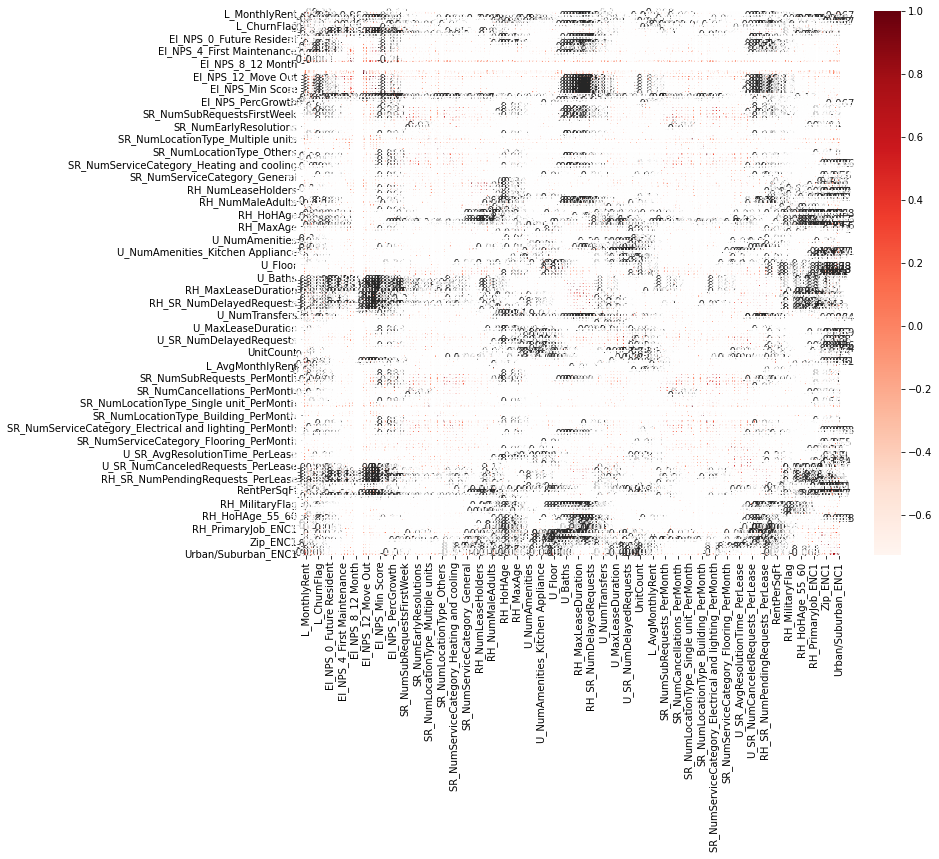

In [32]:
plt.figure(figsize=(12,10))
cor = df_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [22]:
X_train=df_train.drop(["L_ChurnFlag","LeaseUID"],axis=1)
y_train=df_train["L_ChurnFlag"]

In [23]:
X_test=df_test.drop(["L_ChurnFlag","LeaseUID"],axis=1)
y_test=df_test["L_ChurnFlag"]

In [24]:
X_valid=df_valid.drop(["L_ChurnFlag","LeaseUID"],axis=1)
y_valid=df_valid["L_ChurnFlag"]

## LOGISTIC REGRESSION

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [25]:
def evaluate_model(actual, pred):
    # Accuracy Score
    acc_score = round(accuracy_score(actual, pred)*100,2)
    print('Accuracy Score : ',acc_score)
    # ROC AUC score
    roc_score = round(roc_auc_score(actual, pred)*100,2)
    print('ROC AUC score : ',roc_score)
    # Precision score
    prec_score = round(precision_score(actual, pred)*100,2)
    print('Precision score : ', prec_score)
    # Recall score
    rec_score = round(recall_score(actual, pred)*100,2)
    print('Recall score : ', rec_score)

    return acc_score, roc_score, prec_score, rec_score

In [39]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10053  3861]
 [ 5204  5935]]


0.6381670857781503

In [87]:
#standard scaling
X_valid = sc.transform(X_valid)

### Logistic reg (df_train df_test)

In [81]:
classifier = LogisticRegression(random_state = 0,n_jobs=-1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_train=classifier.predict(X_train)

# Model evaluation
print('train accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_train, y_pred_train)
print(" ")
print('test accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)


train accuracy: 
Accuracy Score :  64.46
ROC AUC score :  63.4
Precision score :  61.43
Recall score :  53.89
 
test accuracy: 
Accuracy Score :  63.82
ROC AUC score :  62.77
Precision score :  60.59
Recall score :  53.28


In [58]:
from sklearn.neighbors import KNeighborsClassifier

## K NEAREST NEIGHBOUR

In [44]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[9489 4425]
 [5803 5336]]


0.5917454995409731

### KNN (df_train df_test)

In [82]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_train=classifier.predict(X_train)

# Model evaluation
print('train accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_train, y_pred_train)
print(" ")
print('test accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

train accuracy: 
Accuracy Score :  73.59
ROC AUC score :  72.71
Precision score :  72.81
Recall score :  64.79
 
test accuracy: 
Accuracy Score :  59.17
ROC AUC score :  58.05
Precision score :  54.67
Recall score :  47.9


In [31]:
!pip install xgboost

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

# Gradient boosting

In [43]:
# initialize the GradientBoosting
model = GradientBoostingClassifier(random_state=12)
# fit the training data
model.fit(X_train, y_train)
# predict the testing data
Y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[8716 5198]
 [5203 5936]]


0.5848401389055203

### GB (df_train df_test)

In [89]:
# initialize the GradientBoosting
classifier = GradientBoostingClassifier(random_state=12)
# fit the training data
classifier.fit(X_train, y_train)
# predict the testing data
Y_pred = classifier.predict(X_test)
y_pred_train=classifier.predict(X_train)

# Model evaluation
print('train accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_train, y_pred_train)
print(" ")
print('test accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

train accuracy: 
Accuracy Score :  66.44
ROC AUC score :  64.88
Precision score :  65.91
Recall score :  50.8
 
test accuracy: 
Accuracy Score :  67.57
ROC AUC score :  66.09
Precision score :  67.26
Recall score :  52.73


# XGB Classifier

In [42]:
# Initialize the XGBoost
model = XGBClassifier(random_state=12)
# fit the  training data
model.fit(X_train, y_train)
# predict the testing data
Y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:00:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[8716 5198]
 [5203 5936]]


0.5848401389055203

### XGB (df_train df_test)

In [85]:
# Initialize the XGBoost
model = XGBClassifier(random_state=12)
# fit the  training data
model.fit(X_train, y_train)
# predict the testing data
Y_pred = model.predict(X_test)

# Model evaluation
print('train accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_train, y_pred_train)
print(" ")
print('test accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:31:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train accuracy: 
Accuracy Score :  73.59
ROC AUC score :  72.71
Precision score :  72.81
Recall score :  64.79
 
test accuracy: 
Accuracy Score :  58.48
ROC AUC score :  57.97
Precision score :  53.31
Recall score :  53.29


# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[8716 5198]
 [5203 5936]]


0.5848401389055203

### Decision Tree (df_train df_test)

In [84]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Model evaluation
print('train accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_train, y_pred_train)
print(" ")
print('test accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

train accuracy: 
Accuracy Score :  73.59
ROC AUC score :  72.71
Precision score :  72.81
Recall score :  64.79
 
test accuracy: 
Accuracy Score :  58.48
ROC AUC score :  57.97
Precision score :  53.31
Recall score :  53.29


# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0,n_jobs=-1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10889  3025]
 [ 6306  4833]]


0.6275495948588992

### Random Forest (df_train df_test)

In [83]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0,n_jobs=-1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Model evaluation
print('train accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_train, y_pred_train)
print(" ")
print('test accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

train accuracy: 
Accuracy Score :  73.59
ROC AUC score :  72.71
Precision score :  72.81
Recall score :  64.79
 
test accuracy: 
Accuracy Score :  62.75
ROC AUC score :  60.82
Precision score :  61.5
Recall score :  43.39


In [46]:
!pip install lightgbm

In [36]:
import lightgbm

In [53]:
classifier = lightgbm.LGBMClassifier()
classifier.fit(X_train2, y_train2)
y_pred = classifier.predict(X_valid2)
y_pred_train=classifier.predict(X_train2)

# Model evaluation
print('train accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_train2, y_pred_train)
print(" ")
print('test accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_valid2, y_pred)

train accuracy: 
Accuracy Score :  69.35
ROC AUC score :  67.9
Precision score :  69.74
Recall score :  54.86
 
test accuracy: 
Accuracy Score :  66.4
ROC AUC score :  64.91
Precision score :  65.59
Recall score :  51.41


In [88]:
classifier = lightgbm.LGBMClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_train=classifier.predict(X_train)

# Model evaluation
print('train accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_train, y_pred_train)
print(" ")
print('test accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

train accuracy: 
Accuracy Score :  70.0
ROC AUC score :  68.59
Precision score :  70.57
Recall score :  55.8
 
test accuracy: 
Accuracy Score :  67.57
ROC AUC score :  66.09
Precision score :  67.26
Recall score :  52.73


# PCA

In [91]:
from sklearn.decomposition import PCA
# Initialize pca preserving 95% of the variability in data
pca = PCA(n_components=0.95,random_state=12)
# fit and transform the training dataset
X_train_pca = pca.fit_transform(X_train)
# transform the testing dataset
X_test_pca = pca.transform(X_test)

In [93]:
X_train_pca.shape,X_test_pca.shape

((116914, 78), (25053, 78))

In [94]:
classifier = lightgbm.LGBMClassifier()
classifier.fit(X_train_pca, y_train)
y_pred = classifier.predict(X_test_pca)
y_pred_train=classifier.predict(X_train_pca)

# Model evaluation
print('train accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_train, y_pred_train)
print(" ")
print('test accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

train accuracy: 
Accuracy Score :  68.26
ROC AUC score :  66.95
Precision score :  67.55
Recall score :  55.08
 
test accuracy: 
Accuracy Score :  63.99
ROC AUC score :  62.6
Precision score :  61.72
Recall score :  50.03


# Handling MultiCollinearity

In [17]:
def remove_highly_correlated(df_train, corThreshold, plot=False):
    
    #generate the plot of required
    if plot:
        plot_correlation_heatmap(df_train)

    # Create correlation matrix
    corr_matrix = df_train.corr().abs()    
    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))    
    # Find index of feature columns with correlation greater than threshold
    to_drop = [column for column in upper.columns if any(upper[column] > corThreshold)]    
    #drop the columns as formulated above
    print("No of columns dropped for high correlation :", len(to_drop),to_drop)
    return(df_train.drop(columns=to_drop))

In [18]:
def plot_correlation_heatmap(df_train):
    
    import seaborn as sns
    import matplotlib.pyplot as plt
    #Generate a mask for the upper triangle
    corr = df_train.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True  
    #Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(12, 10))    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

<ipython-input-34-72af02b89cf6>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


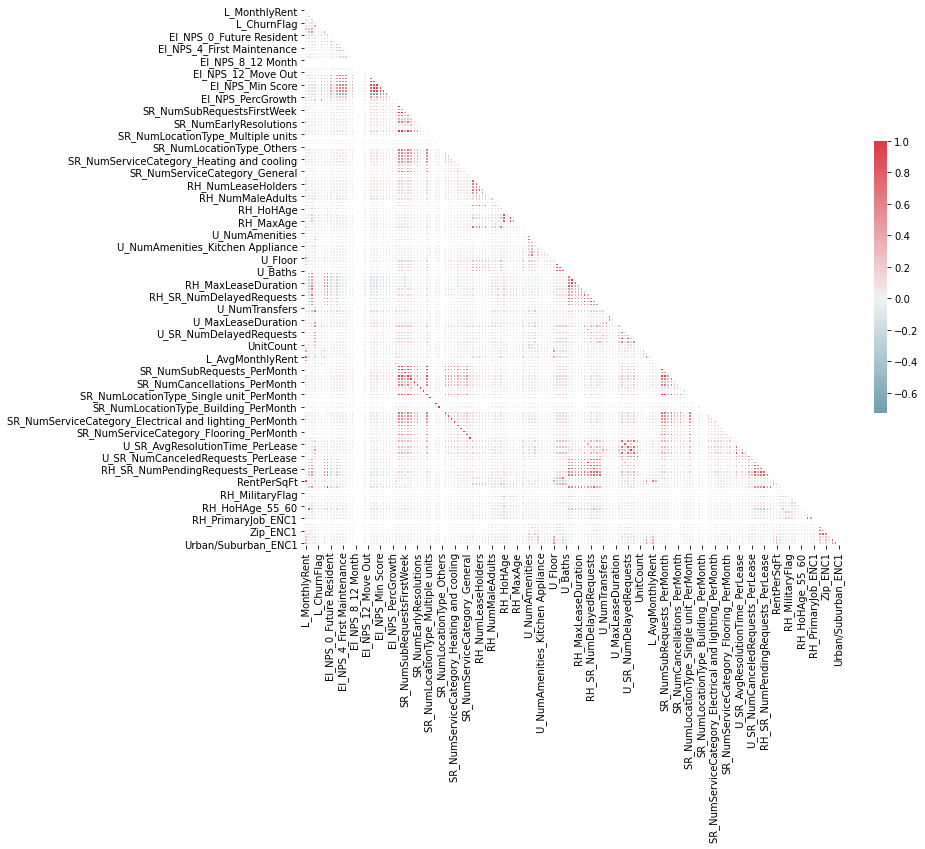

In [35]:
plot_correlation_heatmap(df_train)

<ipython-input-20-72af02b89cf6>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)
<ipython-input-19-634de257bc51>:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


No of columns dropped for high correlation : 51 ['EI_NPS_X_Latest Score', 'EI_NPS_Min Score', 'EI_NPS_Max Score', 'EI_NPS_Avg Score', 'SR_NumSubRequests', 'SR_NumResolutions', 'SR_NumLocationType_Single unit', 'RH_NumAdults', 'RH_NumSingleAdults', 'RH_AvgAge', 'RH_MinAge', 'RH_MaxAge', 'U_RentableSquareFootage', 'RH_MinLeaseDuration', 'RH_MaxLeaseDuration', 'RH_SR_NumDelayedRequests', 'RH_SR_NumPendingRequests', 'RH_SR_NumCompletedRequests', 'U_SR_NumCompletedRequests', 'SR_NumRequests_PerMonth', 'SR_NumSubRequests_PerMonth', 'SR_NumSubRequestsFirstWeek_PerMonth', 'SR_NumResolutions_PerMonth', 'SR_NumDelayedResolutions_PerMonth', 'SR_NumCancellations_PerMonth', 'SR_NumEarlyResolutions_PerMonth', 'SR_AvgResolutionTime_PerMonth', 'SR_AvgDelayTime_PerMonth', 'SR_NumLocationType_Single unit_PerMonth', 'SR_NumLocationType_Multiple units_PerMonth', 'SR_NumLocationType_Common area_PerMonth', 'SR_NumLocationType_Building_PerMonth', 'SR_NumServiceCategory_Plumbing and bath_PerMonth', 'SR_NumSer

LeaseUID  L_MonthlyRent  L_Duration  RH_LeaseIndex  U_LeaseIndex  \
0       1027515-13523         2272.0          12              1             7   
1       1023394-23196         2374.0          12              6            10   
2           4499308-8         1206.0          11              1             1   
3       1310609-22395         2346.0          12              1             9   
4       2335216-33429         1385.0          12              9             9   
...               ...            ...         ...            ...           ...   
116909  1026858-25083         1671.0          12              1             8   
116910   1071425-8023         1545.0          12              2             7   
116911  4459796-10308         3330.0          12              1             2   
116912   2421378-2808         3049.0          12              6             6   
116913  2917813-51977         3345.0          12              1             8   

        L_ChurnFlag  L_ActualBeginYear  L_PrevRentAmount  L_PercRentIncrease  \
0                 1               2016              -1.0           -1.000000   
1                 0               2017            2296.0            0.033972   
2                 0               2018              -1.0           -1.000000   
3                 0               2017              -1.0           -1.000000   
4                 0               2018            2962.0           -0.532411   
...             ...                ...               ...                 ...   
116909            1               2016              -1.0           -1.000000   
116910            0               2015            1184.0            0.304899   
116911            0               2019              -1.0           -1.000000   
116912            0               2015            2913.0            0.046687   
116913            1               2019              -1.0           -1.000000   

        EI_NPS_0_Future Resident  EI_NPS_1_Transfer  EI_NPS_2_Move In  \
0                           -1.0               -1.0              -1.0   
1                           -1.0               -1.0              -1.0   
2                           -1.0               -1.0              -1.0   
3                           -1.0               -1.0              -1.0   
4                           -1.0               -1.0              -1.0   
...                          ...                ...               ...   
116909                      -1.0               -1.0              -1.0   
116910                      -1.0               -1.0              -1.0   
116911                      10.0               -1.0              10.0   
116912                      -1.0               -1.0              -1.0   
116913                      -1.0               -1.0              -1.0   

        EI_NPS_3_3 Month  EI_NPS_4_First Maintenance  EI_NPS_5_6 Month  \
0                   -1.0                        -1.0              -1.0   
1                   -1.0                        -1.0              -1.0   
2                   -1.0                        -1.0              -1.0   
3                    8.0                        -1.0               8.0   
4                   -1.0                        -1.0              -1.0   
...                  ...                         ...               ...   
116909              -1.0                        -1.0              -1.0   
116910              -1.0                        -1.0              -1.0   
116911              -1.0                        10.0              10.0   
116912              -1.0                        -1.0              -1.0   
116913              -1.0                        -1.0              -1.0   

        EI_NPS_6_9 Month  EI_NPS_7_Mid Lease Maintenance  EI_NPS_8_12 Month  \
0                   -1.0                            -1.0               -1.0   
1                   -1.0                            -1.0               -1.0   
2                   -1.0                            -1.0               -1.0 

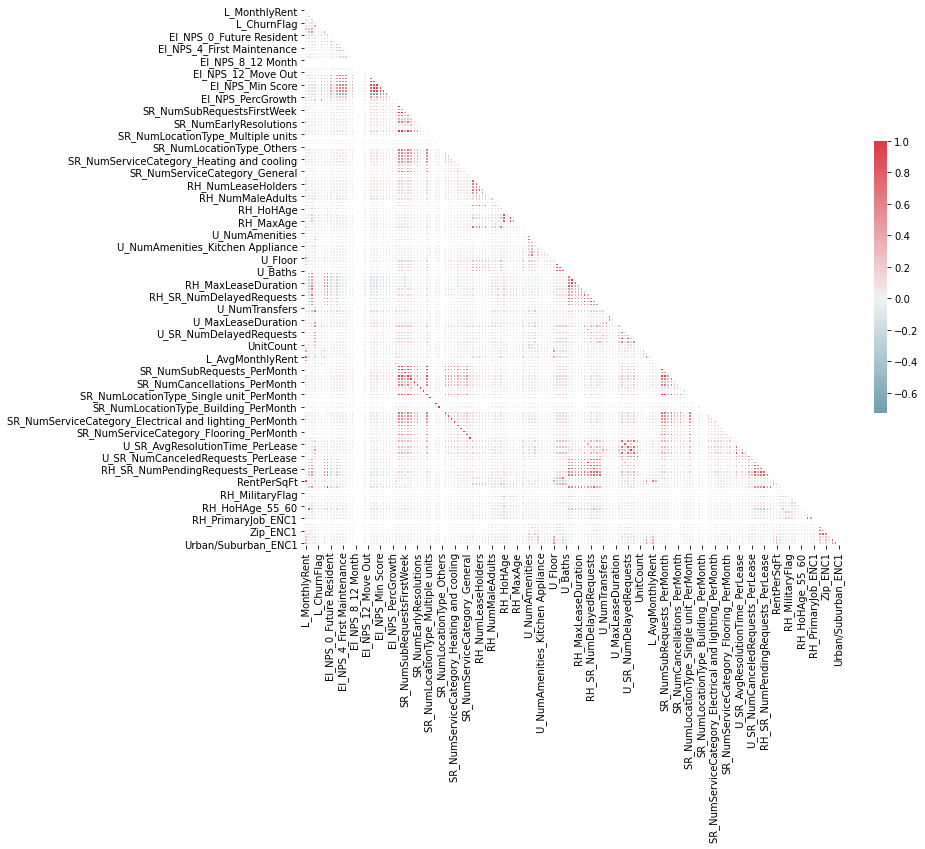

In [21]:
remove_highly_correlated(df_train, corThreshold=0.85, plot=True)

In [19]:
to_drop=['EI_NPS_X_Latest Score', 'EI_NPS_Min Score', 'EI_NPS_Max Score', 'EI_NPS_Avg Score', 'SR_NumSubRequests', 'SR_NumResolutions', 'SR_NumLocationType_Single unit', 'RH_NumAdults', 'RH_NumSingleAdults', 'RH_AvgAge', 'RH_MinAge', 'RH_MaxAge', 'U_RentableSquareFootage', 'RH_MinLeaseDuration', 'RH_MaxLeaseDuration', 'RH_SR_NumDelayedRequests', 'RH_SR_NumPendingRequests', 'RH_SR_NumCompletedRequests', 'U_SR_NumCompletedRequests', 'SR_NumRequests_PerMonth', 'SR_NumSubRequests_PerMonth', 'SR_NumSubRequestsFirstWeek_PerMonth', 'SR_NumResolutions_PerMonth', 'SR_NumDelayedResolutions_PerMonth', 'SR_NumCancellations_PerMonth', 'SR_NumEarlyResolutions_PerMonth', 'SR_AvgResolutionTime_PerMonth', 'SR_AvgDelayTime_PerMonth', 'SR_NumLocationType_Single unit_PerMonth', 'SR_NumLocationType_Multiple units_PerMonth', 'SR_NumLocationType_Common area_PerMonth', 'SR_NumLocationType_Building_PerMonth', 'SR_NumServiceCategory_Plumbing and bath_PerMonth', 'SR_NumServiceCategory_Appliance_PerMonth', 'SR_NumServiceCategory_Electrical and lighting_PerMonth', 'SR_NumServiceCategory_Heating and cooling_PerMonth', 'SR_NumServiceCategory_Doors and locks_PerMonth', 'SR_NumServiceCategory_Safety equipment_PerMonth', 'SR_NumServiceCategory_Flooring_PerMonth', 'SR_NumServiceCategory_General_PerMonth', 'SR_NumServiceCategory_Others_PerMonth', 'U_SR_NumDelayedRequests_PerLease', 'U_SR_NumPendingRequests_PerLease', 'U_SR_NumCompletedRequests_PerLease', 'RH_SR_AvgResolutionTime_PerLease', 'RH_SR_NumDelayedRequests_PerLease', 'RH_SR_NumPendingRequests_PerLease', 'RH_SR_NumCompletedRequests_PerLease', 'RentPerSqFt', 'L_PercRentIncreaseBin', 'L_DurationBin_ENC1']

In [20]:
df_test = df_test.drop(columns=to_drop,axis=1)

In [21]:
df_train = df_train.drop(columns=to_drop,axis=1)
df_valid = df_valid.drop(columns=to_drop,axis=1)

In [53]:
classifier = lightgbm.LGBMClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_train=classifier.predict(X_train)

# Model evaluation
print('train accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_train, y_pred_train)
print("  ")
print('test accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

train accuracy: 
Accuracy Score :  69.85
ROC AUC score :  68.43
Precision score :  70.41
Recall score :  55.54
 
test accuracy: 
Accuracy Score :  67.48
ROC AUC score :  65.96
Precision score :  67.29
Recall score :  52.26


In [54]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0,n_jobs=-1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Model evaluation
print('train accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_train, y_pred_train)
print(" ")
print('test accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

train accuracy: 
Accuracy Score :  69.85
ROC AUC score :  68.43
Precision score :  70.41
Recall score :  55.54
 
test accuracy: 
Accuracy Score :  63.26
ROC AUC score :  61.35
Precision score :  62.26
Recall score :  44.11


In [26]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
pd.set_option('display.max_row', None)
rf.feature_importances_
df=pd.DataFrame({"Feature_names":X_train.columns,"importance":rf.feature_importances_})
df_new=df.sort_values(by="importance",ascending=False)
df_new

Feature_names  importance
93                            L_RentToAvgRentRatio    0.049117
54                                       RH_HoHAge    0.031142
0                                    L_MonthlyRent    0.029112
91                        AX_Effective_Rent_Growth    0.022361
92                                L_AvgMonthlyRent    0.021998
90                               AX_Effective_Rent    0.021551
89                                    AX_Occupancy    0.021297
98                 U_SR_AvgResolutionTime_PerLease    0.021064
6                               L_PercRentIncrease    0.021064
84                          U_SR_AvgResolutionTime    0.020734
97                       U_SR_NumRequests_PerLease    0.020394
79                              U_AvgLeaseDuration    0.020215
68                            U_GrossSquareFootage    0.020137
61                   U_NumAmenities_Unit Amenities    0.019151
83                                U_SR_NumRequests    0.018975
116                                       Zip_ENC1    0.018267
85                         U_SR_NumDelayedRequests    0.018091
30                            SR_AvgResolutionTime    0.018061
59                                  U_NumAmenities    0.018017
55                             RH_DistanceFromWork    0.015888
58                                  RH_TotalSalary    0.015343
25                                  SR_NumRequests    0.015337
99               U_SR_NumCanceledRequests_PerLease    0.014384
2                                    RH_LeaseIndex    0.014018
114                                      City_ENC1    0.013524
88                                       UnitCount    0.013473
78                                     U_NumChurns    0.013233
31                                 SR_AvgDelayTime    0.013090
80                              U_MinLeaseDuration    0.012450
3                                     U_LeaseIndex    0.011872
5                                 L_PrevRentAmount    0.011787
74                               RH_SR_NumRequests    0.010445
4                                L_ActualBeginYear    0.010423
75                         RH_SR_AvgResolutionTime    0.010400
29                          SR_NumEarlyResolutions    0.010307
67                                         U_Floor    0.010260
100                     RH_SR_NumRequests_PerLease    0.010196
87                        U_SR_NumCanceledRequests    0.010138
37         SR_NumServiceCategory_Plumbing and bath    0.009528
60                              U_NumAmenityGroups    0.009347
117                                    Market_ENC1    0.009271
112                             RH_PrimaryJob_ENC1    0.009188
38                 SR_NumServiceCategory_Appliance    0.008627
72                             RH_AvgLeaseDuration    0.008526
27                        SR_NumDelayedResolutions    0.008467
81                              U_MaxLeaseDuration    0.008426
82                                  U_NumMTMLeases    0.008323
62                          U_NumAmenities_Kitchen    0.008154
12                                EI_NPS_5_6 Month    0.008020
103                           BedroomOccupantRatio    0.007884
110                                 RH_HoHJob_ENC1    0.007687
39   SR_NumServiceCategory_Electrical and lighting    0.007452
115                                     State_ENC1    0.007386
1                                       L_Duration    0.007385
66                           U_NumAmenities_Others    0.007248
21                            EI_NPS_X_First Score    0.007087
44                   SR_NumServiceCategory_General    0.007051
106                                RH_HoHAge_20_27    0.006879
40       SR_NumServiceCategory_Heating and cooling    0.006787
41           SR_NumServiceCategory_Doors and locks    0.006282
46                                   RH_NumMembers    0.006184
23                               EI_NPS_PercGrowth    0.005941
111                              RH_NonHoHJob_ENC1    0.005681
101  

In [39]:
len(df_new)

121

In [28]:
imp_features=[]

for i in df_new['Feature_names'][:60]:
    imp_features.append(i)
imp_features

['L_RentToAvgRentRatio',
 'RH_HoHAge',
 'L_MonthlyRent',
 'AX_Effective_Rent_Growth',
 'L_AvgMonthlyRent',
 'AX_Effective_Rent',
 'AX_Occupancy',
 'U_SR_AvgResolutionTime_PerLease',
 'L_PercRentIncrease',
 'U_SR_AvgResolutionTime',
 'U_SR_NumRequests_PerLease',
 'U_AvgLeaseDuration',
 'U_GrossSquareFootage',
 'U_NumAmenities_Unit Amenities',
 'U_SR_NumRequests',
 'Zip_ENC1',
 'U_SR_NumDelayedRequests',
 'SR_AvgResolutionTime',
 'U_NumAmenities',
 'RH_DistanceFromWork',
 'RH_TotalSalary',
 'SR_NumRequests',
 'U_SR_NumCanceledRequests_PerLease',
 'RH_LeaseIndex',
 'City_ENC1',
 'UnitCount',
 'U_NumChurns',
 'SR_AvgDelayTime',
 'U_MinLeaseDuration',
 'U_LeaseIndex',
 'L_PrevRentAmount',
 'RH_SR_NumRequests',
 'L_ActualBeginYear',
 'RH_SR_AvgResolutionTime',
 'SR_NumEarlyResolutions',
 'U_Floor',
 'RH_SR_NumRequests_PerLease',
 'U_SR_NumCanceledRequests',
 'SR_NumServiceCategory_Plumbing and bath',
 'U_NumAmenityGroups',
 'Market_ENC1',
 'RH_PrimaryJob_ENC1',
 'SR_NumServiceCategory_Applia

In [29]:
df_train2 = df_train.loc[:,imp_features]

In [30]:
df_test2=df_test.loc[:, imp_features]
df_valid2=df_valid.loc[:, imp_features]

In [31]:
X_train2=df_train2[:]
y_train2=df_train["L_ChurnFlag"]

In [32]:
X_test2=df_test2[:]
y_test2=df_test["L_ChurnFlag"]

In [33]:
X_valid2=df_valid2[:]
y_valid2=df_valid["L_ChurnFlag"]

In [39]:
classifier = lightgbm.LGBMClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_valid)
y_pred_train=classifier.predict(X_train)

# Model evaluation
print('train accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_train, y_pred_train)
print(" ")
print('test accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_valid, y_pred)

train accuracy: 
Accuracy Score :  69.85
ROC AUC score :  68.43
Precision score :  70.41
Recall score :  55.54
 
test accuracy: 
Accuracy Score :  67.07
ROC AUC score :  65.6
Precision score :  66.51
Recall score :  52.26


In [56]:
classifier2 = lightgbm.LGBMClassifier()
classifier2.fit(X_train2, y_train2)
y_pred2 = classifier2.predict(X_test2)
y_pred_train2=classifier2.predict(X_train2)

# Model evaluation
print('train accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_train2, y_pred_train2)
print(" ")
print('test accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test2, y_pred2)

train accuracy: 
Accuracy Score :  68.61
ROC AUC score :  67.11
Precision score :  68.9
Recall score :  53.58
 
test accuracy: 
Accuracy Score :  66.32
ROC AUC score :  64.77
Precision score :  65.71
Recall score :  50.74


In [59]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train2, y_train2)
y_pred2 = classifier.predict(X_test2)
y_pred_train2=classifier.predict(X_train2)

# Model evaluation
print('train accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_train2, y_pred_train2)
print(" ")
print('test accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test2, y_pred2)

train accuracy: 
Accuracy Score :  73.25
ROC AUC score :  72.21
Precision score :  73.24
Recall score :  62.79
 
test accuracy: 
Accuracy Score :  58.36
ROC AUC score :  57.13
Precision score :  53.7
Recall score :  46.07


In [34]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0,n_jobs=-1)
classifier.fit(X_train2, y_train2)
y_pred2 = classifier.predict(X_test2)
y_pred_train2=classifier.predict(X_train2)
# Model evaluation
print('train accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_train2, y_pred_train2)
print(" ")
print('test accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test2, y_pred2)

train accuracy: 
Accuracy Score :  100.0
ROC AUC score :  100.0
Precision score :  100.0
Recall score :  100.0
 
test accuracy: 
Accuracy Score :  66.47
ROC AUC score :  64.85
Precision score :  66.2
Recall score :  50.24


# Random Forest(Randomized Search CV)

In [25]:
from sklearn.model_selection import RandomizedSearchCV


In [64]:
# specify parameters space
parameters = [{'n_estimators':[10,20,30,40,50,60,70],
               'max_depth': [3,4,5,7],
               'criterion':['entropy','gini'],
               'min_samples_split':[5,4,6,7,8],
                "bootstrap": [True, False],
               'max_features':['auto', 'sqrt', 'log2']
               }]
# run RandomizedSearchCV search
random_search = RandomizedSearchCV(estimator= classifier,
                           param_distributions= parameters,
                           scoring = 'accuracy',
                           n_jobs = -1,
                           verbose=2,
                           cv = 5)

random_search.fit(X_train2,y_train2)
best_accuracy = random_search.best_score_
best_param=random_search.best_params_
best_estimator = random_search.best_estimator_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best estimator:", best_estimator)
print("Best Parameters:", best_estimator)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Accuracy: 64.20 %
Best estimator: RandomForestClassifier(max_depth=7, min_samples_split=8, n_estimators=50,
                       n_jobs=-1, random_state=0)
Best Parameters: RandomForestClassifier(max_depth=7, min_samples_split=8, n_estimators=50,
                       n_jobs=-1, random_state=0)


In [42]:
classifier = RandomForestClassifier(max_depth=7, min_samples_split=8, n_estimators=50,
                       n_jobs=-1, random_state=0)
classifier.fit(X_train2, y_train2)
y_pred2 = classifier.predict(X_test2)
y_pred_train2=classifier.predict(X_train2)

# Model evaluation
print('train accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_train2, y_pred_train2)
print(" ")
print('test accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test2, y_pred2)

train accuracy: 
Accuracy Score :  65.74
ROC AUC score :  63.63
Precision score :  67.34
Recall score :  44.54
 
test accuracy: 
Accuracy Score :  64.52
ROC AUC score :  62.4
Precision score :  65.2
Recall score :  43.3


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Random Forest (GrisSearch Cv)

In [29]:
# specify parameters space
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0)

parameters = [{'n_estimators':[10,20,30,40,50,60,70],
               'max_depth': [3,4,5,7],
               'criterion':['entropy','gini'],
               'min_samples_split':[5,4,6,7,8],
                "bootstrap": [True, False],
               'max_features':['auto', 'sqrt', 'log2']
               }]
# run RandomizedSearchCV search
grid_search = GridSearchCV(estimator= classifier,
                           param_grid= parameters,
                           scoring = 'accuracy',
                           n_jobs = -1,
                           verbose=2,
                           cv = 5)

grid_search.fit(X_train,y_train)
best_accuracy = grid_search.best_score_
best_param=grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best estimator:", best_estimator)
print("Best Parameters:", best_estimator)

Fitting 5 folds for each of 1680 candidates, totalling 8400 fits
Best Accuracy: 64.89 %
Best estimator: RandomForestClassifier(bootstrap=False, max_depth=7, min_samples_split=8,
                       n_estimators=70, random_state=0)
Best Parameters: RandomForestClassifier(bootstrap=False, max_depth=7, min_samples_split=8,
                       n_estimators=70, random_state=0)


In [32]:
classifier = RandomForestClassifier(bootstrap=False, max_depth=7, min_samples_split=8,
                       n_estimators=70, random_state=0,n_jobs = -1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_train=classifier.predict(X_train)

# Model evaluation
print('train accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_train, y_pred_train)
print(" ")
print('test accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

train accuracy: 
Accuracy Score :  65.95
ROC AUC score :  63.83
Precision score :  67.78
Recall score :  44.66
 
test accuracy: 
Accuracy Score :  64.71
ROC AUC score :  62.54
Precision score :  65.82
Recall score :  42.92


In [52]:
oot_data.shape


(19527, 134)

In [41]:
oot_data2=oot_data[:]

In [44]:
oot_data2=oot_data2.loc[:,imp_features]

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['L_RentToAvgRentRatio', 'L_AvgMonthlyRent',\n       'U_SR_AvgResolutionTime_PerLease', 'U_SR_NumRequests_PerLease',\n       'Zip_ENC1',\n       ...\n       'RH_PrimaryJob_ENC1', 'RH_HoHAge_20_27', 'BedroomOccupantRatio',\n       'RH_HoHJob_ENC1', 'State_ENC1'],\n      dtype='object', length=15). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [49]:
cols=list(oot_data2.columns.values)
cols

['LeaseUID',
 'L_MonthlyRent',
 'L_Duration',
 'L_DurationBin',
 'RH_LeaseIndex',
 'U_LeaseIndex',
 'L_ChurnFlag',
 'L_PrevRentAmount',
 'L_PercRentIncrease',
 'EI_NPS_0_Future Resident',
 'EI_NPS_1_Transfer',
 'EI_NPS_2_Move In',
 'EI_NPS_3_3 Month',
 'EI_NPS_4_First Maintenance',
 'EI_NPS_5_6 Month',
 'EI_NPS_6_Mid Lease Maintenance',
 'EI_NPS_7_9 Month',
 'EI_NPS_8_12 Month',
 'EI_NPS_9_15 Month',
 'EI_NPS_10_18 Month',
 'EI_NPS_11_Renewal',
 'EI_NPS_12_Move Out',
 'EI_NumSurveys',
 'EI_NPS_X_First Score',
 'EI_NPS_X_Latest Score',
 'EI_NPS_Min Score',
 'EI_NPS_Max Score',
 'EI_NPS_Avg Score',
 'EI_NPS_Growth',
 'EI_NPS_PercGrowth',
 'RI_ParkingFlag',
 'RI_ParkingFlag_PERM',
 'RI_ParkingFlag_RESERVED',
 'RI_ParkingFlag_UNRESERVED',
 'SR_NumRequests',
 'SR_NumSubRequests',
 'SR_NumSubRequestsFirstWeek',
 'SR_NumResolutions',
 'SR_NumDelayedResolutions',
 'SR_NumCancellations',
 'SR_NumEarlyResolutions',
 'SR_AvgResolutionTime',
 'SR_AvgDelayTime',
 'SR_NumLocationType_Single unit',
 

In [53]:
df_train3 = df_train.filter(cols, axis=1) 

In [54]:
X_train3=df_train3.drop(["L_ChurnFlag","LeaseUID"],axis=1)
y_train3=df_train3["L_ChurnFlag"]

In [55]:
X_oot=oot_data2.drop(["L_ChurnFlag","LeaseUID"],axis=1)
y_oot=oot_data2["L_ChurnFlag"]

# Random Forest (oot_data)

In [56]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0,n_jobs=-1)
classifier.fit(X_train3, y_train3)
y_pred2 = classifier.predict(X_oot)
y_pred_train2=classifier.predict(X_train3)
# Model evaluation
print('train accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_train3, y_pred_train2)
print(" ")
print('test accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_oot, y_pred2)

ValueError: could not convert string to float: '1-3 years'